<a href="https://colab.research.google.com/github/Tut-Gatwech/TU-repo/blob/main/Machine_Learning_Regression_Models_using_House_Price_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine-Learning-Regression-Models-using-House-Price-Dataset!

I'm doing a dataset of housing prices with multiple features.
I  applied several regression models: Linear, Multi-Linear, Polynomial, KNN, and Decision Tree Regression.

**Steps:**

1.Load the data.

2.Preprocess the data (handle categorical variables, split into train and test, etc.)

3.Apply each regression model.

4.Evaluate each model and compare their performance.

Let's note the columns:
price (target)
area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus

We have both numerical and categorical columns.

Since we are using multiple models, we'll create a pipeline for each model that includes preprocessing.

We'll use:

OneHotEncoder for categorical variables.

StandardScaler for numerical variables (for models that require scaling, like KNN and polynomial regression with linear models).

However, note that tree-based models (Decision Tree) do not require scaling.

We'll split the data into training and testing sets.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Set style for better visualizations

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. LOAD AND EXPLORE DATA ##

-Load the dataset

In [ ]:
df = pd.read_csv('/content/Housing Price.csv')

print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nDataset Info:")
print(df.info())

DATASET OVERVIEW
Dataset Shape: (545, 13)

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3 

## 2.DATA PREPROCESSING

In [ ]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)


DATA PREPROCESSING


-Create a copy for preprocessing

In [ ]:
df_processed = df.copy()

-Convert categorical yes/no columns to binary (1/0)


VISUALIZING BINARY COLUMN CONVERSION
mainroad: 'no' → 0, 'yes' → 1
guestroom: 'no' → 0, 'yes' → 1
basement: 'no' → 0, 'yes' → 1
hotwaterheating: 'no' → 0, 'yes' → 1
airconditioning: 'no' → 0, 'yes' → 1
prefarea: 'no' → 0, 'yes' → 1


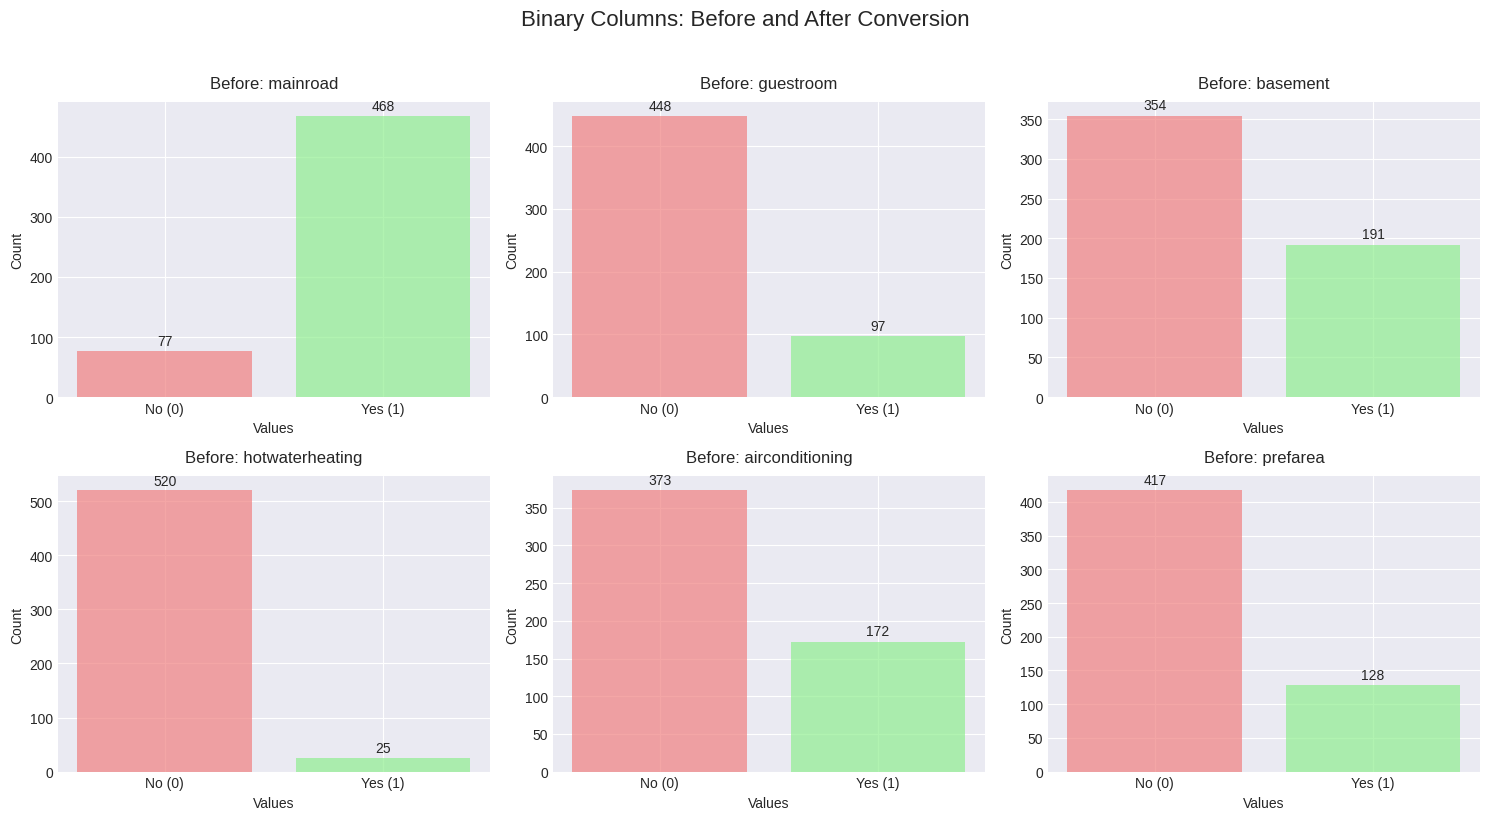

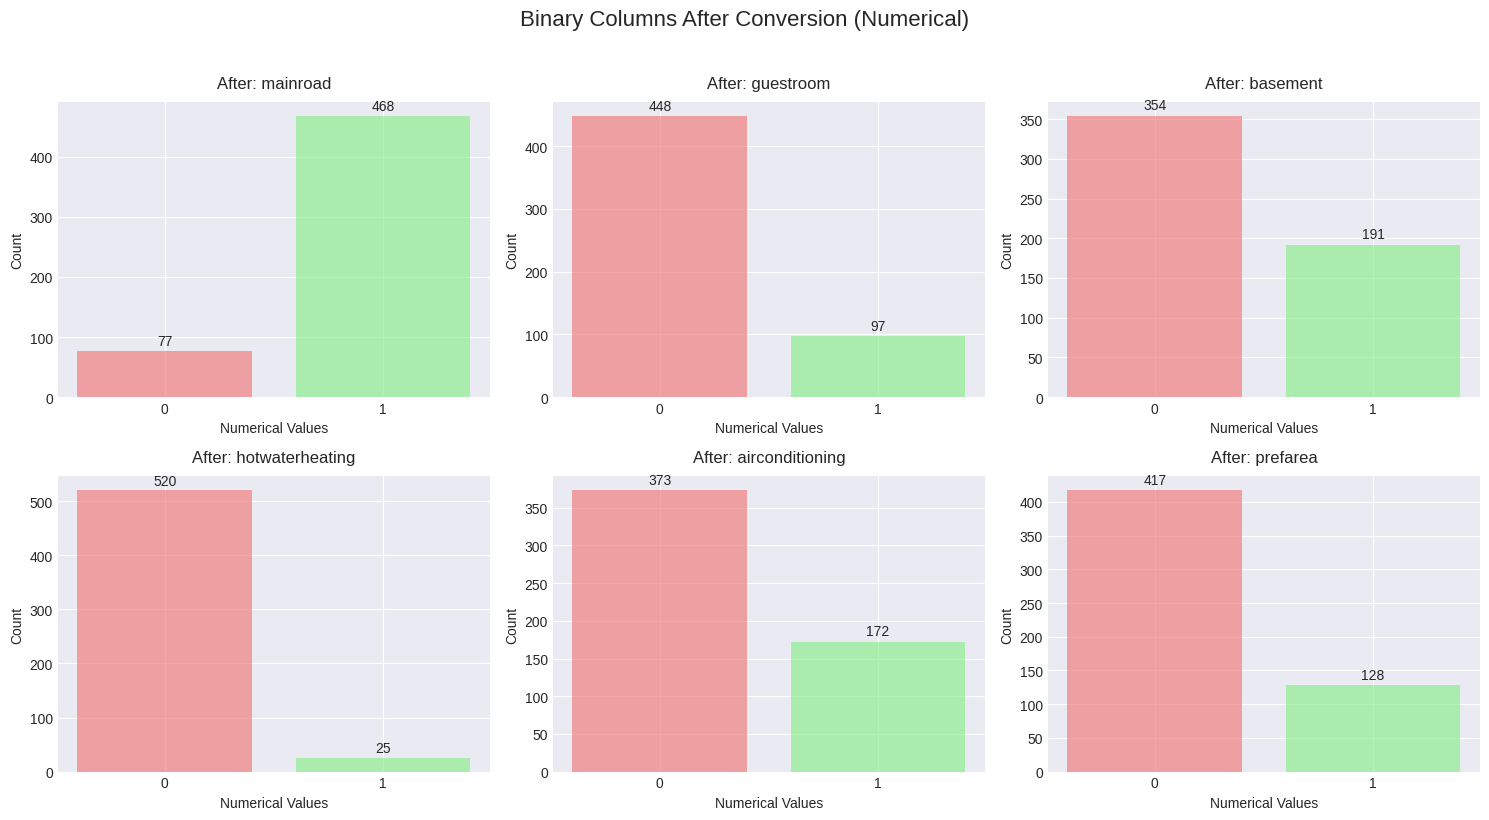


📋 Binary Column Conversion Mapping:
         Column Original "no"  Converted to Original "yes"
       mainroad           yes             1             no
      guestroom           yes             1             no
       basement           yes             1             no
hotwaterheating           yes             1             no
airconditioning           yes             1             no
       prefarea           yes             1             no
Processed Data Shape: (545, 14)

Processed Data Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [ ]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                  'airconditioning', 'prefarea']

for col in binary_columns:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})


print("\n" + "="*50)
print("VISUALIZING BINARY COLUMN CONVERSION")
print("="*50)

# Create a figure with subplots for each binary column
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Binary Columns: Before and After Conversion', fontsize=16, y=1.02)


axes = axes.flatten()

for idx, col in enumerate(binary_columns):

    ax = axes[idx]
    plt.subplot(2, 3, idx + 1)

    plt.subplot(2, 3, idx + 1)
    before_counts = df[col].value_counts().sort_index()
    bars1 = plt.bar(['No (0)', 'Yes (1)'], before_counts,
                    color=['lightcoral', 'lightgreen'], alpha=0.7)
    plt.title(f'Before: {col}', fontsize=12, pad=10)
    plt.xlabel('Values')
    plt.ylabel('Count')

    # Add count labels on bars
    for bar, count in zip(bars1, before_counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count}', ha='center', va='bottom', fontsize=10)

    # Show the mapping
    print(f"{col}: 'no' → 0, 'yes' → 1")

plt.tight_layout()
plt.show()

# Show after conversion in a separate plot
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Binary Columns After Conversion (Numerical)', fontsize=16, y=1.02)

for idx, col in enumerate(binary_columns):
    ax = axes[idx // 3, idx % 3]

    # After conversion
    after_counts = df_processed[col].value_counts().sort_index()
    colors = ['lightcoral', 'lightgreen']
    bars2 = ax.bar(['0', '1'], after_counts, color=colors, alpha=0.7)
    ax.set_title(f'After: {col}', fontsize=12, pad=10)
    ax.set_xlabel('Numerical Values')
    ax.set_ylabel('Count')

    # Add count labels on bars
    for bar, count in zip(bars2, after_counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Display the mapping table
mapping_table = pd.DataFrame({
    'Column': binary_columns,
    'Original "no"': ['yes' for _ in binary_columns],
    'Converted to': [0 for _ in binary_columns],
    'Original "yes"': ['no' for _ in binary_columns],
    'Converted to': [1 for _ in binary_columns]
})

print("\n📋 Binary Column Conversion Mapping:")
print(mapping_table.to_string(index=False))

# One-hot encode furnishingstatus
df_processed = pd.get_dummies(df_processed, columns=['furnishingstatus'], drop_first=True)

# Check the processed data
print("Processed Data Shape:", df_processed.shape)
print("\nProcessed Data Columns:")
print(df_processed.columns.tolist())


## 3. EXPLORATORY DATA ANALYSIS ##

In [ ]:
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)
print("\nStatistical Summary:")
print(df_processed.describe())


EXPLORATORY DATA ANALYSIS

Statistical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.2093

Correlation matrix

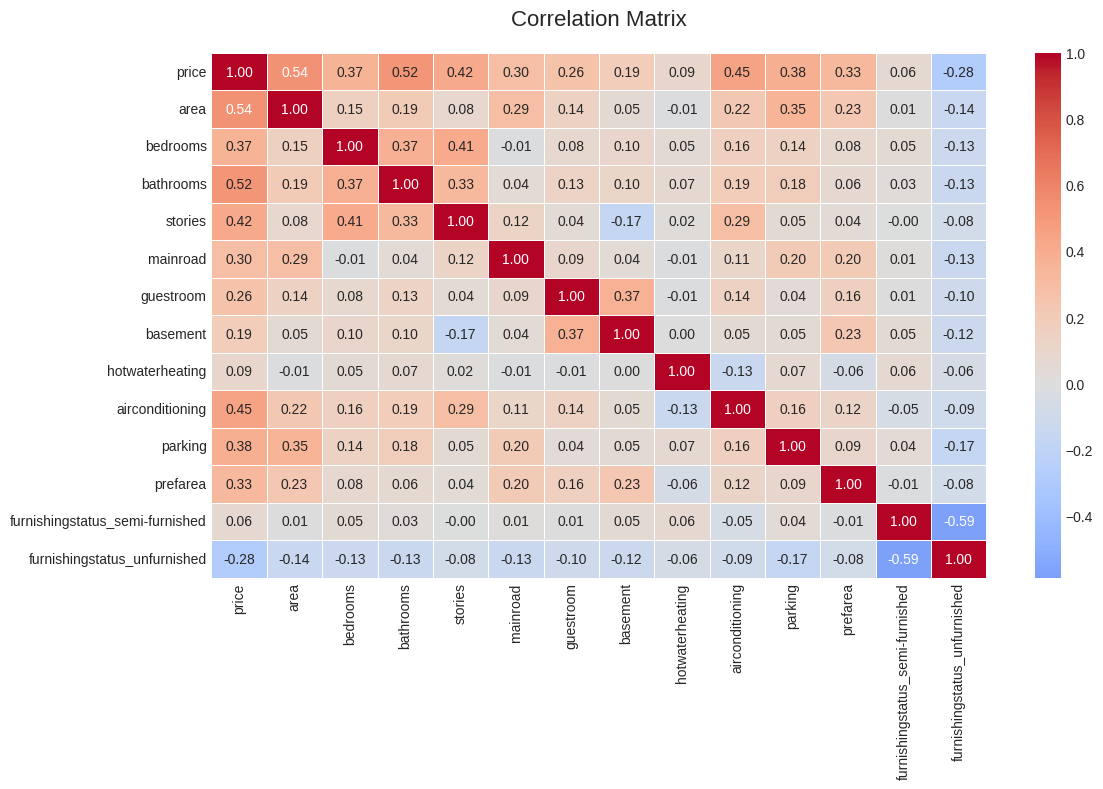

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Distribution of target variable

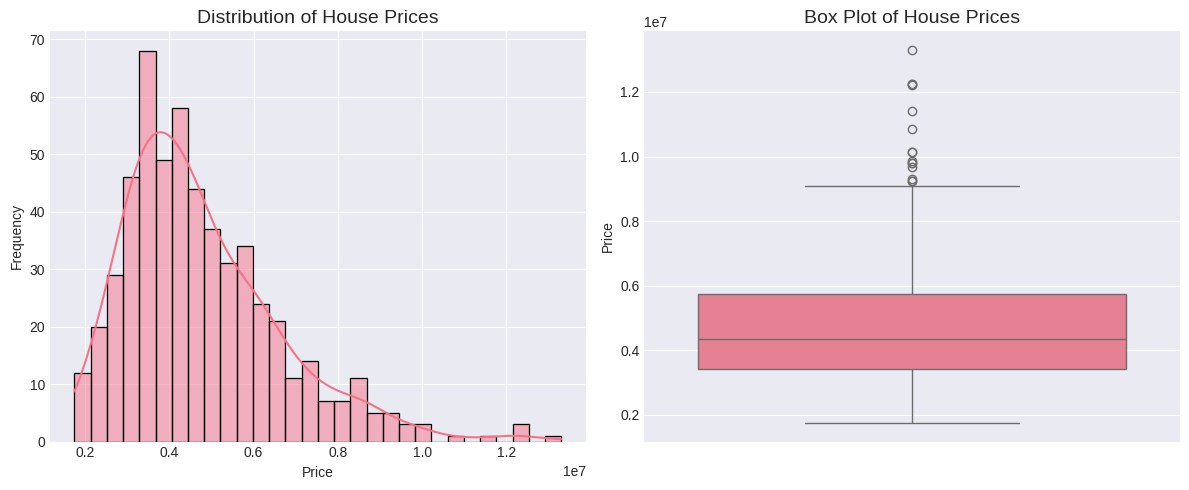

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Box Plot of House Prices', fontsize=14)
plt.ylabel('Price')
plt.tight_layout()
plt.show()

-Visualize binary columns distribution after conversion


Distribution of Binary Features After Conversion:


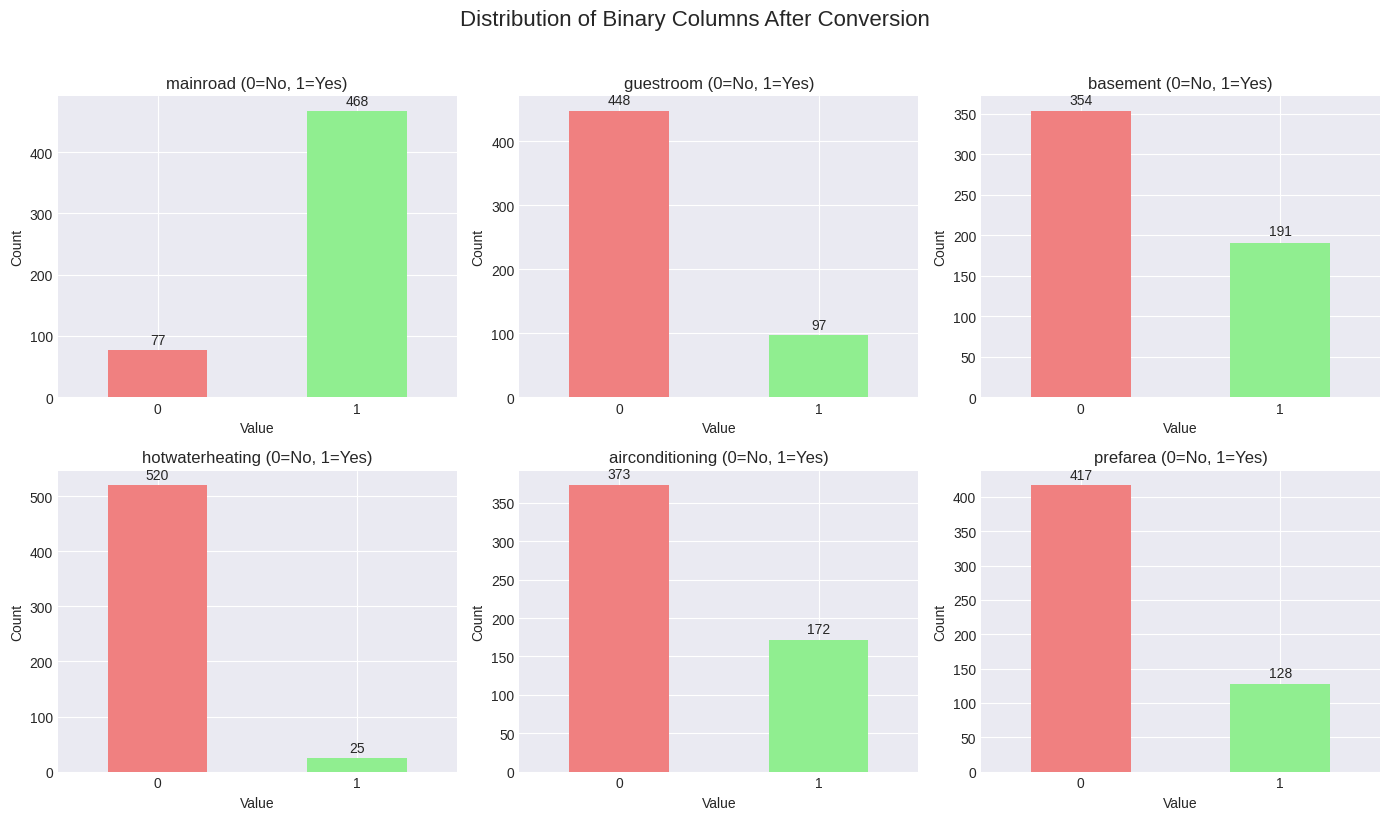

In [ ]:
print("\nDistribution of Binary Features After Conversion:")
plt.figure(figsize=(14, 8))
for idx, col in enumerate(binary_columns, 1):
    plt.subplot(2, 3, idx)
    df_processed[col].value_counts().sort_index().plot(kind='bar',
                                                      color=['lightcoral', 'lightgreen'])
    plt.title(f'{col} (0=No, 1=Yes)')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add count labels
    for i, v in enumerate(df_processed[col].value_counts().sort_index()):
        plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.suptitle('Distribution of Binary Columns After Conversion', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 4.PREPARE DATA FOR MODELING ##

In [ ]:
print("\n" + "="*50)
print("PREPARING DATA FOR MODELING")
print("="*50)


PREPARING DATA FOR MODELING


-Separate features and target

In [ ]:
X = df_processed.drop('price', axis=1)
y = df_processed['price']

-Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (436, 13)
Test set size: (109, 13)


-Scale the features(important for KNN and plynomial regression)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.LINEAR REGRESSION

In [ ]:
print("\n" + "="*50)
print("LINEAR REGRESSION")
print("="*50)


LINEAR REGRESSION


-Create and train the model


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

-Make prediction

In [ ]:
y_pred_lr = lr_model.predict(X_test)

-Calculate metrix

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse_lr:,.2f}")
print(f"Root Mean Squared Error: {rmse_lr:,.2f}")
print(f"Mean Absolute Error: {mae_lr:,.2f}")
print(f"R-squared Score: {r2_lr:.4f}")

Mean Squared Error: 1,754,318,687,330.66
Root Mean Squared Error: 1,324,506.96
Mean Absolute Error: 970,043.40
R-squared Score: 0.6529


-Cross-validation

In [ ]:
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores_lr}")
print(f"Average CV R2 Score: {cv_scores_lr.mean():.4f}")

Cross-Validation R2 Scores: [ -2.08761653  -5.15625641 -16.34488122 -20.80699862  -5.16406595]
Average CV R2 Score: -9.9120


## 6. MULTI-LINEAR REGRESSION (same as Linear Regression for multiple features) ##

In [ ]:
print("\n" + "="*50)
print("MULTI-LINEAR REGRESSION")
print("="*50)


MULTI-LINEAR REGRESSION


- For multiple features, Linear Regression   is already multi-linear

- Let's just use the same model but emphasize it's for multiple features

In [ ]:
print("Already implemented as Linear Regression with multiple features")
print(f"Number of features used: {X.shape[1]}")

Already implemented as Linear Regression with multiple features
Number of features used: 13


- Feature importance (coefficients)

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

print("\nTop 10 Most Important Features (by coefficient magnitude):")
print(feature_importance.head(10).to_string(index=False))



Top 10 Most Important Features (by coefficient magnitude):
        Feature  Coefficient
      bathrooms 1.094445e+06
airconditioning 7.914267e+05
hotwaterheating 6.846499e+05
       prefarea 6.298906e+05
        stories 4.074766e+05
       basement 3.902512e+05
       mainroad 3.679199e+05
      guestroom 2.316100e+05
        parking 2.248419e+05
       bedrooms 7.677870e+04


## 7. POLYNOMIAL REGRESSION ##

In [ ]:
print("\n" + "="*50)
print("POLYNOMIAL REGRESSION")
print("="*50)


POLYNOMIAL REGRESSION


- Create polynomial features

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

- Create and tarin polynomial regression model

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

- Make predictions

In [ ]:
y_pred_poly = poly_model.predict(X_test_poly)

- Calculate metrics

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Features Created: {X_train_poly.shape[1]}")
print(f"Mean Squared Error: {mse_poly:,.2f}")
print(f"Root Mean Squared Error: {rmse_poly:,.2f}")
print(f"Mean Absolute Error: {mae_poly:,.2f}")
print(f"R-squared Score: {r2_poly:.4f}")

Polynomial Features Created: 104
Mean Squared Error: 1,901,686,413,946.45
Root Mean Squared Error: 1,379,016.47
Mean Absolute Error: 1,034,749.27
R-squared Score: 0.6238


## 8. K-NEAREST NEIGHBORS REGRESSION ##

In [ ]:
print("\n" + "="*50)
print("K-NEAREST NEIGHBORS REGRESSION")
print("="*50)


K-NEAREST NEIGHBORS REGRESSION


- Hyperparameter tuning for KNN

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

- Best parameter and model

In [ ]:
best_knn = grid_search_knn.best_estimator_
print(f"Best Parameters: {grid_search_knn.best_params_}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}


- Make prediction with best model

In [ ]:
y_pred_knn = best_knn.predict(X_test_scaled)

- Claculate metrics

In [ ]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"Mean Squared Error: {mse_knn:,.2f}")
print(f"Root Mean Squared Error: {rmse_knn:,.2f}")
print(f"Mean Absolute Error: {mae_knn:,.2f}")
print(f"R-squared Score: {r2_knn:.4f}")

Mean Squared Error: 2,066,091,932,263.37
Root Mean Squared Error: 1,437,390.67
Mean Absolute Error: 1,029,995.32
R-squared Score: 0.5912


## 9. DECISION TREE REGRESSION ##

In [ ]:
print("\n" + "="*50)
print("DECISION TREE REGRESSION")
print("="*50)


DECISION TREE REGRESSION


- Hyperparameter tuning for Decision Tree

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='r2')

- Best parameters and model

In [ ]:
best_dt = grid_search_dt.best_estimator_
print(f"Best Parameters: {grid_search_dt.best_params_}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


- Make prediction with best model

In [ ]:
y_pred_dt = best_dt.predict(X_test)

- Calculate metrics

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error: {mse_dt:,.2f}")
print(f"Root Mean Squared Error: {rmse_dt:,.2f}")
print(f"Mean Absolute Error: {mae_dt:,.2f}")
print(f"R-squared Score: {r2_dt:.4f}")

Mean Squared Error: 2,597,777,774,930.72
Root Mean Squared Error: 1,611,762.32
Mean Absolute Error: 1,207,548.55
R-squared Score: 0.4861


- Feature importance for Decision Tree

In [ ]:
dt_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
})
dt_feature_importance = dt_feature_importance.sort_values('Importance', ascending=False)

print("\nTop 5 Most Important Features (Decision Tree):")
print(dt_feature_importance.head(5).to_string(index=False))


Top 5 Most Important Features (Decision Tree):
                     Feature  Importance
                        area    0.556215
                   bathrooms    0.193745
             airconditioning    0.052675
                    bedrooms    0.038537
furnishingstatus_unfurnished    0.036487


**Decision Tree** **Visualization**

In [ ]:
print("\n" + "="*50)
print("DECISION TREE VISUALIZATION")
print("="*50)



DECISION TREE VISUALIZATION


- Create a simpler tree for visualization (max_depth=3 for readability)


📊 Simplified Decision Tree Structure (max_depth=3):
----------------------------------------------------------------------


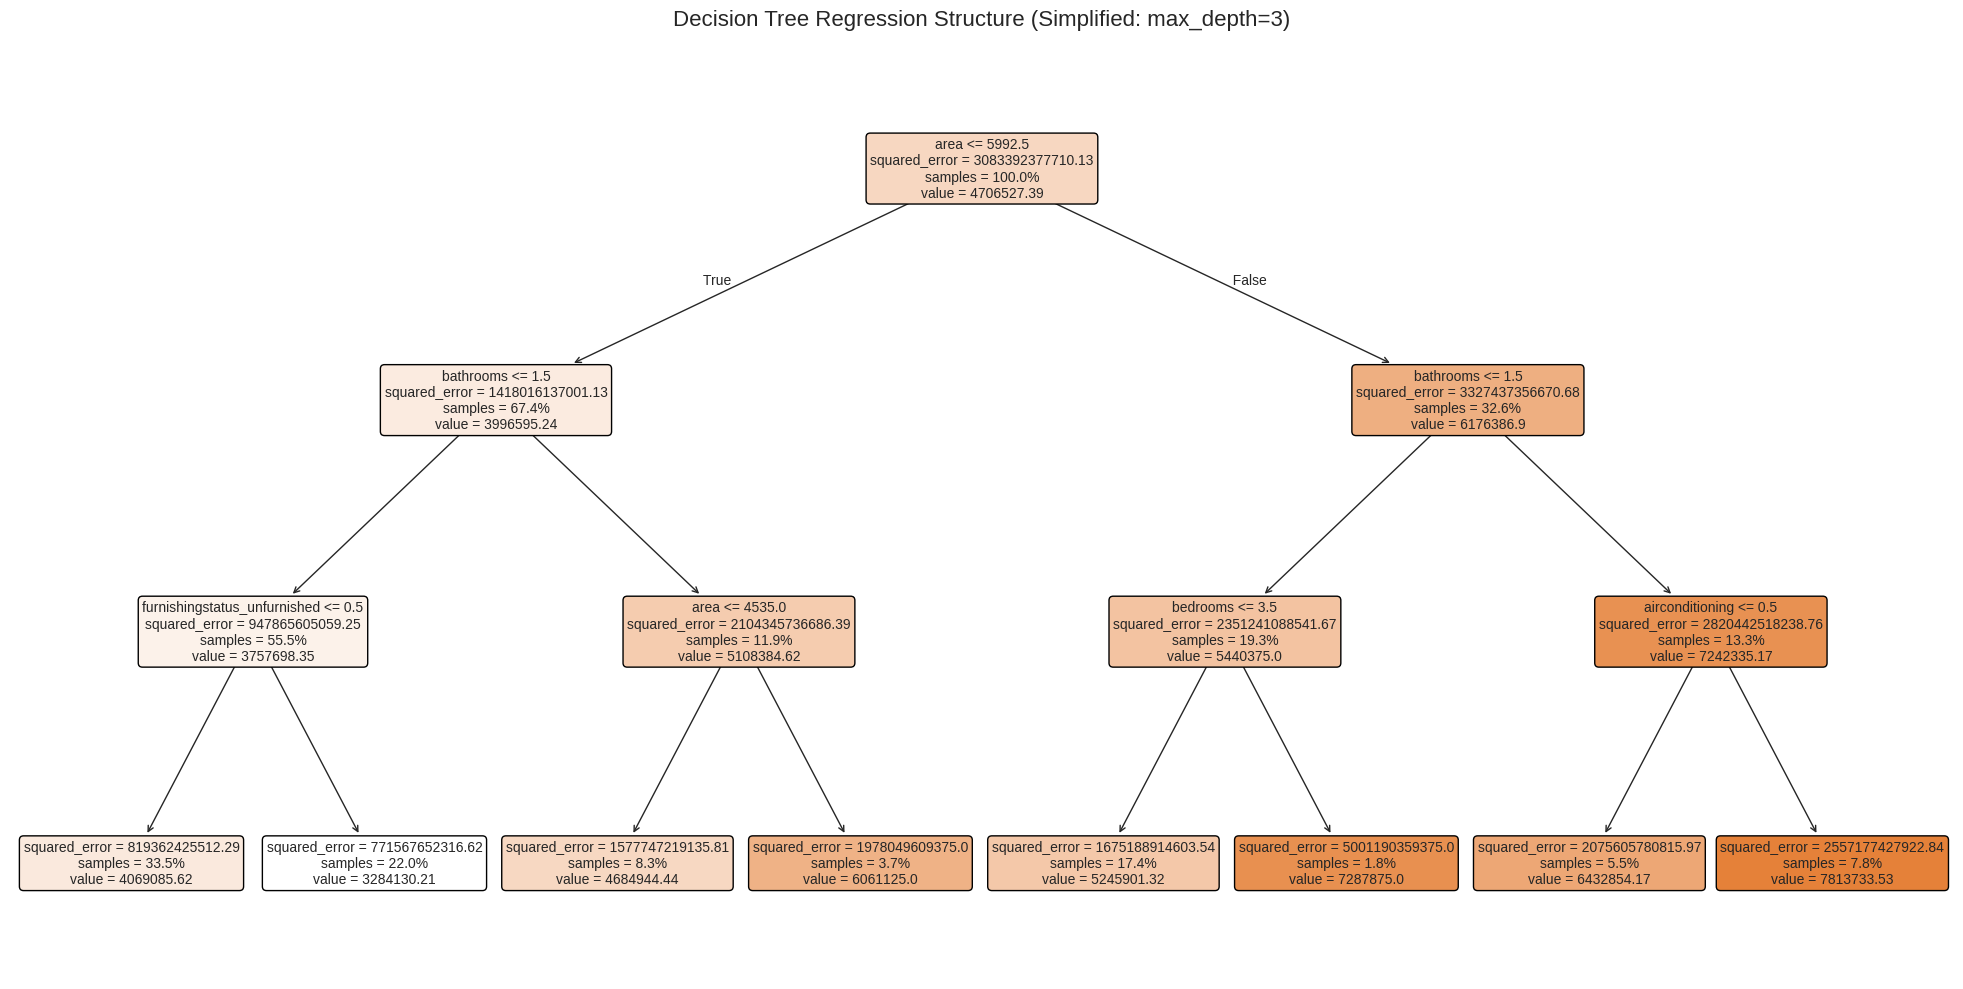

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
simple_tree = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
simple_tree.fit(X_train, y_train)

print("\n📊 Simplified Decision Tree Structure (max_depth=3):")
print("-" * 70)

# 2. Plot the tree diagram
plt.figure(figsize=(20, 10))
plot_tree(simple_tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10,
          proportion=True,
          precision=2)
plt.title("Decision Tree Regression Structure (Simplified: max_depth=3)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


- Print text representation of the tree

In [ ]:
tree_rules = export_text(simple_tree,
                        feature_names=list(X.columns),
                        decimals=2,
                        show_weights=True)
print("\n📝 Text Representation of Decision Tree Rules:")
print("-" * 70)
print(tree_rules)


📝 Text Representation of Decision Tree Rules:
----------------------------------------------------------------------
|--- area <= 5992.50
|   |--- bathrooms <= 1.50
|   |   |--- furnishingstatus_unfurnished <= 0.50
|   |   |   |--- value: [4069085.62]
|   |   |--- furnishingstatus_unfurnished >  0.50
|   |   |   |--- value: [3284130.21]
|   |--- bathrooms >  1.50
|   |   |--- area <= 4535.00
|   |   |   |--- value: [4684944.44]
|   |   |--- area >  4535.00
|   |   |   |--- value: [6061125.00]
|--- area >  5992.50
|   |--- bathrooms <= 1.50
|   |   |--- bedrooms <= 3.50
|   |   |   |--- value: [5245901.32]
|   |   |--- bedrooms >  3.50
|   |   |   |--- value: [7287875.00]
|   |--- bathrooms >  1.50
|   |   |--- airconditioning <= 0.50
|   |   |   |--- value: [6432854.17]
|   |   |--- airconditioning >  0.50
|   |   |   |--- value: [7813733.53]



- Create a similar tree for detailed view (max_depth=2)

In [ ]:
print("\n🔍 Detailed Decision Tree Paths (max_depth=2):")
print("-" * 70)
small_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
small_tree.fit(X_train, y_train)

# Get tree structure
n_nodes = small_tree.tree_.node_count
children_left = small_tree.tree_.children_left
children_right = small_tree.tree_.children_right
feature = small_tree.tree_.feature
threshold = small_tree.tree_.threshold
value = small_tree.tree_.value

print(f"Number of nodes: {n_nodes}")
print(f"Tree depth: {small_tree.get_depth()}")


🔍 Detailed Decision Tree Paths (max_depth=2):
----------------------------------------------------------------------
Number of nodes: 7
Tree depth: 2


- Walk through tree nodes

In [ ]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)

while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

- If we have a test node

In [ ]:
    if children_left[node_id] != children_right[node_id]:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("\nTree Structure:")
for i in range(n_nodes):
        if is_leaves[i]:
          print(f"{node_depth[i]*'  '}node={i}: leaf (predicted price: ₹{value[i][0][0]:,.0f})")
        else:
          feature_name = X.columns[feature[i]]
        print(f"{node_depth[i]*'  '}node={i}: {feature_name} <= {threshold[i]:.2f}")


Tree Structure:
node=0: area <= 5992.50
node=1: bathrooms <= 1.50
node=2: furnishingstatus_semi-furnished <= -2.00
node=3: furnishingstatus_semi-furnished <= -2.00
node=4: bathrooms <= 1.50
node=5: furnishingstatus_semi-furnished <= -2.00
node=6: furnishingstatus_semi-furnished <= -2.00


- Show sample prediction with tree path

In [ ]:
print("\n🌳 Sample Predictions with Tree Path Explanation:")
print("-" * 70)
for i in range(3):  # Show first 3 test samples
    sample_features = X_test.iloc[i]
    actual_price = y_test.iloc[i]
    predicted_price = small_tree.predict([sample_features])[0]

    print(f"\nSample {i+1}:")
    print(f"  Actual Price: ₹{actual_price:,.0f}")
    print(f"  Predicted Price: ₹{predicted_price:,.0f}")
    print(f"  Error: ₹{abs(actual_price - predicted_price):,.0f}")


🌳 Sample Predictions with Tree Path Explanation:
----------------------------------------------------------------------

Sample 1:
  Actual Price: ₹4,060,000
  Predicted Price: ₹5,108,385
  Error: ₹1,048,385

Sample 2:
  Actual Price: ₹6,650,000
  Predicted Price: ₹7,242,335
  Error: ₹592,335

Sample 3:
  Actual Price: ₹3,710,000
  Predicted Price: ₹3,757,698
  Error: ₹47,698


- Show decision path

In [ ]:
    feature_index = small_tree.tree_.feature
    threshold = small_tree.tree_.threshold
    node_indicator = small_tree.decision_path([sample_features])
    leaf_id = small_tree.apply([sample_features])

    print("  Decision Path:")
    node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
    for node_id in node_index:
        if leaf_id[0] == node_id:
            continue
        if sample_features[feature_index[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        feature_name = X.columns[feature_index[node_id]]
        print(f"    {feature_name} {threshold_sign} {threshold[node_id]:.2f}")

  Decision Path:
    area <= 5992.50
    bathrooms <= 1.50


## 10. MODEL COMPARITION ##

In [ ]:
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)


MODEL COMPARISON


- Create comparison dataframe

In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'KNN Regression', 'Decision Tree Regression'],
    'RMSE': [rmse_lr, rmse_poly, rmse_knn, rmse_dt],
    'MAE': [mae_lr, mae_poly, mae_knn, mae_dt],
    'R² Score': [r2_lr, r2_poly, r2_knn, r2_dt]
})

print("\nPerformance Comparison:")
print(comparison_df.to_string(index=False))


Performance Comparison:
                   Model         RMSE          MAE  R² Score
       Linear Regression 1.324507e+06 9.700434e+05  0.652924
   Polynomial Regression 1.379016e+06 1.034749e+06  0.623769
          KNN Regression 1.437391e+06 1.029995e+06  0.591243
Decision Tree Regression 1.611762e+06 1.207549e+06  0.486054


- Visualization of model comparison

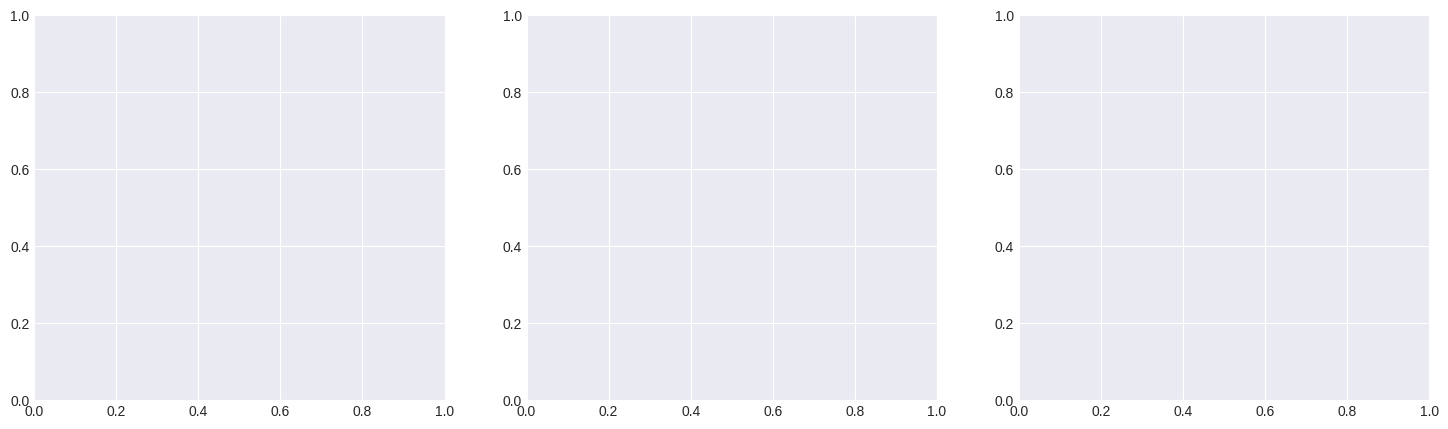

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

- RMSE Comparison

In [ ]:
axes[0].bar(comparison_df['Model'], comparison_df['RMSE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0].set_title('RMSE Comparison', fontsize=14)
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['RMSE']):
    axes[0].text(i, v + 50000, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

- MAE Comparison

In [ ]:
axes[1].bar(comparison_df['Model'], comparison_df['MAE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1].set_title('MAE Comparison', fontsize=14)
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['MAE']):
    axes[1].text(i, v + 50000, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

- R² Score Comparison

In [ ]:
axes[2].bar(comparison_df['Model'], comparison_df['R² Score'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[2].set_title('R² Score Comparison', fontsize=14)
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['R² Score']):
    axes[2].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## 11. PREDICTION VISUALIZATION

In [ ]:
print("\n" + "="*50)
print("PREDICTION VISUALIZATION")
print("="*50)


PREDICTION VISUALIZATION


- Create a sample of actual vs predicted values for each model

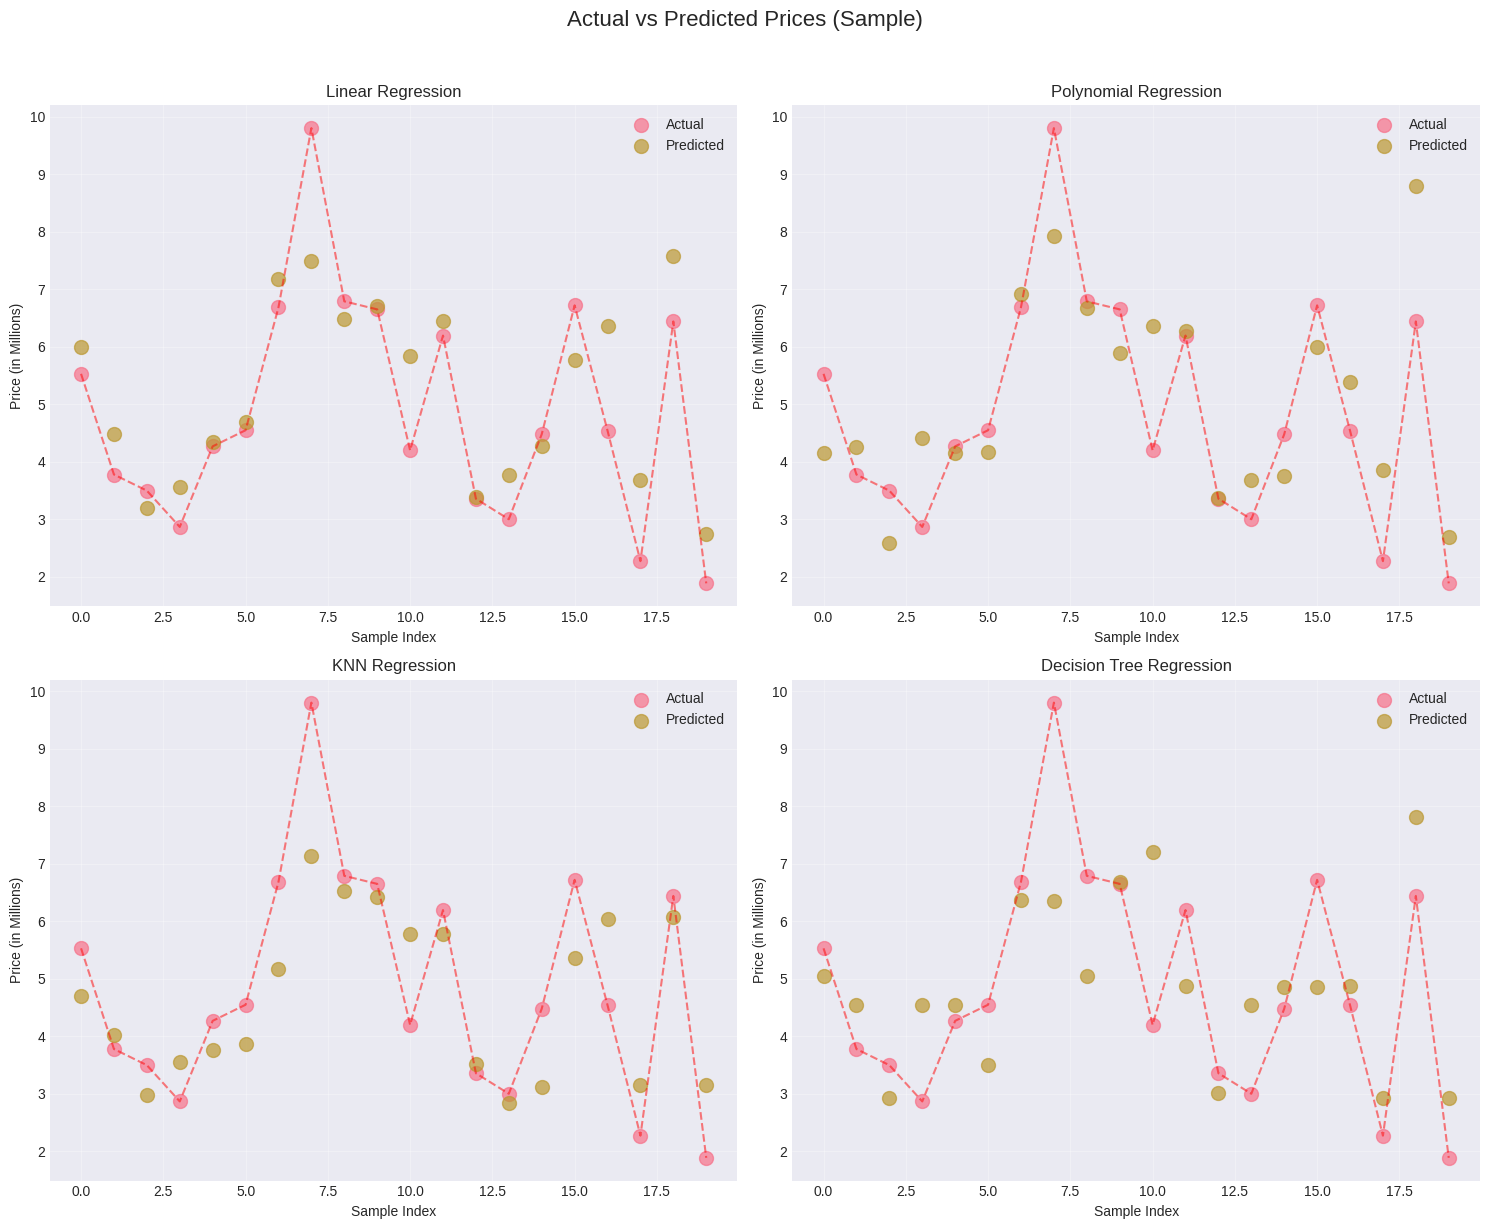

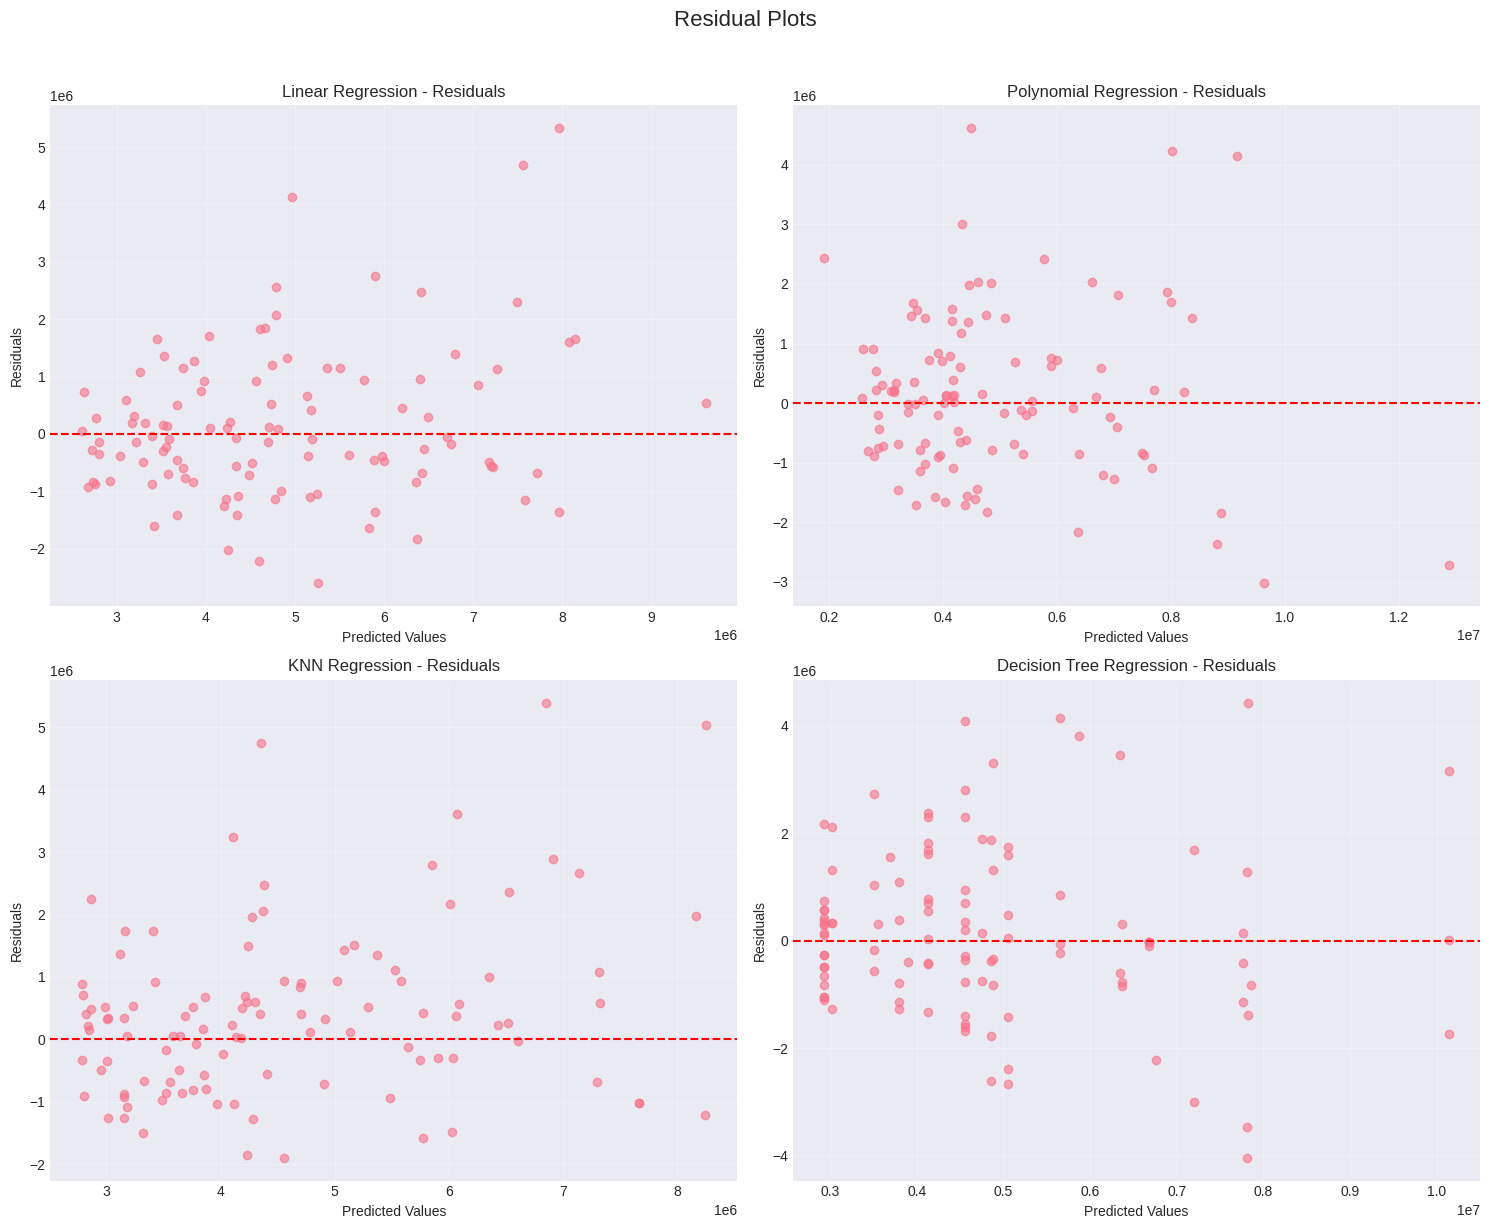

In [ ]:
sample_size = min(20, len(y_test))
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Actual vs Predicted Prices (Sample)', fontsize=16, y=1.02)

models = [('Linear Regression', y_pred_lr),
          ('Polynomial Regression', y_pred_poly),
          ('KNN Regression', y_pred_knn),
          ('Decision Tree Regression', y_pred_dt)]

for idx, (model_name, predictions) in enumerate(models):
    row = idx // 2
    col = idx % 2

    sample_actual = y_test.iloc[sample_indices].values / 1e6  # Convert to millions for readability
    sample_pred = predictions[sample_indices] / 1e6

    axes[row, col].scatter(range(sample_size), sample_actual, alpha=0.7, label='Actual', s=100)
    axes[row, col].scatter(range(sample_size), sample_pred, alpha=0.7, label='Predicted', s=100)
    axes[row, col].set_title(model_name, fontsize=12)
    axes[row, col].set_xlabel('Sample Index')
    axes[row, col].set_ylabel('Price (in Millions)')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)


    axes[row, col].plot(range(sample_size), sample_actual, 'r--', alpha=0.5, label='Perfect Fit')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Residual Plots', fontsize=16, y=1.02)

for idx, (model_name, predictions) in enumerate(models):
    row = idx // 2
    col = idx % 2

    residuals = y_test - predictions
    axes[row, col].scatter(predictions, residuals, alpha=0.6)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel('Predicted Values')
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'{model_name} - Residuals')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. FINAL RESULT SUMMARY ##

In [ ]:
print("\n" + "="*50)
print("FINAL RESULTS SUMMARY")
print("="*50)



FINAL RESULTS SUMMARY


- Find best model based on R² score

In [ ]:
best_model_idx = comparison_df['R² Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_r2 = comparison_df.loc[best_model_idx, 'R² Score']

print(f"\n🎯 Best Performing Model: {best_model_name}")
print(f"   R² Score: {best_model_r2:.4f}")
print(f"   RMSE: {comparison_df.loc[best_model_idx, 'RMSE']:,.2f}")
print(f"   MAE: {comparison_df.loc[best_model_idx, 'MAE']:,.2f}")

print("\n📊 Model Performance Ranking (by R² Score):")
ranked_models = comparison_df.sort_values('R² Score', ascending=False)
for i, (_, row) in enumerate(ranked_models.iterrows(), 1):
    print(f"{i}. {row['Model']}: R² = {row['R² Score']:.4f}, RMSE = {row['RMSE']:,.2f}")

print("\n" + "="*50)
print("HOUSING PRICE PREDICTION ANALYSIS COMPLETE")
print("="*50)


🎯 Best Performing Model: Linear Regression
   R² Score: 0.6529
   RMSE: 1,324,506.96
   MAE: 970,043.40

📊 Model Performance Ranking (by R² Score):
1. Linear Regression: R² = 0.6529, RMSE = 1,324,506.96
2. Polynomial Regression: R² = 0.6238, RMSE = 1,379,016.47
3. KNN Regression: R² = 0.5912, RMSE = 1,437,390.67
4. Decision Tree Regression: R² = 0.4861, RMSE = 1,611,762.32

HOUSING PRICE PREDICTION ANALYSIS COMPLETE


# Interpretation of Results

#Model Performance

**Linear Regression** achieved the highest R² (0.6529) and the lowest RMSE (1,324,506.96) and MAE (970,043.40). This indicates that a linear model explains about 65.3% of the variance in housing prices, which is a reasonable baseline.

**Polynomial Regression** (R²=0.6238) performed slightly worse than linear regression, suggesting that the relationships between features and price are predominantly linear, and adding polynomial terms might have led to overfitting or added noise.

**K-Nearest Neighbors** (KNN) regression (R²=0.5912) performed moderately, indicating that local similarity in the feature space has some predictive power but is not as strong as the global linear trend.

**Decision Tree Regression** (R²=0.4861) performed the worst, which is surprising because decision trees are known to capture non-linear relationships. However, this could be due to the tree being too shallow (to avoid overfitting) or because the continuous nature of the target variable is better modeled by linear methods in this case.

**Feature Importance
From Decision Tree**:

**Area** is the most important feature (55.62% importance), followed by bathrooms (19.37%) and airconditioning (5.27%).

This suggests that physical attributes (size and number of bathrooms) and a key amenity (air conditioning) are the primary drivers in the tree's decision-making process.

**From Linear Regression (coefficients):**
**Bathrooms** have the highest positive coefficient (approximately ₹1,094,445 per bathroom), followed by **airconditioning** (₹791,427 if present) and **hotwaterheating** (₹684,650 if present).

Interestingly, **bedrooms** have a relatively small coefficient (₹76,779), which is much lower than that of bathrooms. This could indicate that bathrooms are a more valued feature than bedrooms in this housing market.

**Business Implications**

- The linear model suggests that adding a bathroom increases the price by about ₹1.09 million, while adding a bedroom only increases it by about ₹76,780. This could inform renovation decisions.

- Having air conditioning adds about ₹791,427 to the price, and having a hot water heater adds about ₹684,650. These are significant premiums that sellers can highlight.

**Limitations and Future Work**
**Dataset Size:** With only 545 samples, the models might not capture the full complexity of the housing market.

**Feature Set:** Additional features such as location (neighborhood), age of the property, school district, etc., could improve the model.

**Model Tuning**: While we performed hyperparameter tuning, the decision tree model might require a different set of parameters or a more advanced ensemble method (like Random Forest or Gradient Boosting) to improve performance.

**Non-Linearity:** The polynomial regression model did not improve performance, but other non-linear models (like SVM with non-linear kernels) could be explored.

**Conclusion**
Despite the expectation that more complex models would perform better, the linear regression model provided the best predictions for this dataset. This could be due to the linear relationships between the features and the target variable. The decision tree model, while interpretable, did not capture as much variance and may require further tuning or the use of ensemble methods.